# [CSCE 508] HW03: DL-based Tasks

**Points:** 100 points

**Posted:** Tue, Apr 1, 2025

**Due:** 5PM, Thur, Apr 17, 2025

**Submission:** please rename the .ipynb file as __HW03_C00XXXXXX_FirstName_LastName.ipynb__ and submit it to **Moodle**.


# <b>1. Gradient descent (10 pts) </b>


Let's implement the gradient descend method to find the minimum value for the function $g(x) = 0.066x^4-0.32x^3-0.85x^2+ 4.2x+8.2$.

initial result: x=5.50, g(x)=12.74
final result: x=4.27, g(x)=7.66


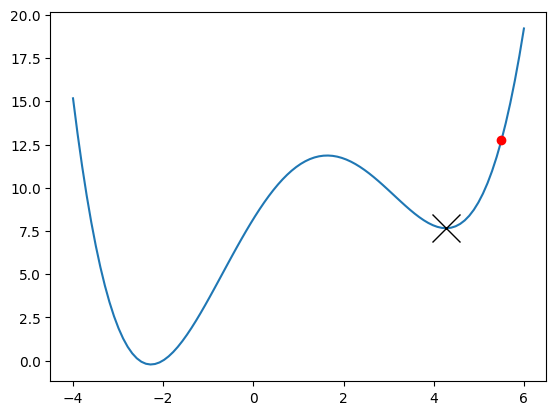

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## function definition
def g(x):
    # return the value of the defined g(x) at value x
    return 8.2 + 4.2*x**1 -0.85*x**2 -0.32*x**3+ 0.066*x**4

def Dg(x):
    # return the value of the gradient of the defined g(x) at value x
    return 4.2 -1.7*x -0.96*x**2+ 0.264*x**3

## gradient descent
def optimizer_grad_descent(x0, grad, alpha = 0.1, num_step = 100, x_ran=None):
    for x in range(num_step):
        # gradient descent update
        x0 = x0 - alpha * grad(x0)
        if x_ran is not None:
          # clip the value
          x0 = np.clip(x0, x_ran[0], x_ran[1])
    return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x1 = optimizer_grad_descent(x0, Dg, alpha = 0.1, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x1,g(x1), 'kx', markersize=20)
plt.show()

# [10 pts] Gradient descent with momentum
Let's implement a better optimization method: "gradient descend with momentum" method described in [distill.pub paper](https://distill.pub/2017/momentum/).
The high-level idea is that instead of trusting the current gradient 100%, we can linearly combine the previous gradients (i.e., carry on the momemtum) and the current gradient. With this, it can stabilize the search moves (e.g., not affected by noisy local gradient) and get out of stuck of the local optima where the current graident is 0.

Here's the new Update formula (we discussed in Lecture 16):
- $z^{k+1}=\beta z^{k}+ \dfrac{dg}{dx}(x^{k})$
- $x^{k+1}=x^{k} -\alpha z^{k+1}$

Note that, if $\beta=0$, the update rule is the same as the gradient descent method. Usually, $0<\beta<1$.

Let's implement this algorithm and find the global mimina for the above function $g(x)$.

In [ ]:
## gradient descent with momemtum
def optimizer_grad_descent_momentum(x0, grad, alpha = 0.1, beta = 0.99, num_step = 100, x_ran=None):
    v0 = 0
    for x in range(num_step):
        # gradient descend with momentum update

        ### Your code starts here


        ### Your code ends here
        if x_ran is not None:
            # clip the value
            x0 = np.clip(x0, x_ran[0], x_ran[1])
    return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x2 = optimizer_grad_descent_momentum(x0, Dg, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x2, g(x2)))
xx = np.linspace(*x_ran, 100)
plt.plot(xx, g(xx))
plt.plot(x0,g(x0), 'ro')
plt.plot(x2,g(x2), 'kx', markersize=20)
plt.show()

# <b>2. MLP model (5 pts)</b>

# Two-layer MLP (1 hidden layer)
- Pytorch Basics: To build a deep learning model in Pytorch, we need to define the needed layers under `__init__()` and specify the model computation under `foward()`. The gradient computation is automatically done under the parent's `backward()` (can be overwritten if needed).
- Example: a 2-layer MLP model with 10-dim input, 5-dim output, and 20 neurons for the hidden layer.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP_oneHiddenLayer(nn.Module):
  def __init__(self, input_dim, output_dim, num_neuron, nonlinear=F.relu):
    super(MLP_oneHiddenLayer, self).__init__()

    self.fc1 = nn.Linear(input_dim, num_neuron)
    self.fc2 = nn.Linear(num_neuron, output_dim)
    self.nonlinear = nonlinear

  def forward(self, x):
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)


# [5 pts] N-layer MLP
- Let's build a MLP model with the input number of hidden layers and number of neurons.
- In Pytorch, we can first create a list of layers `layers=[..]` and then use `nn.Sequential(*layers)` to chain them up in the computation, which is equivalent to using the for-loop.

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, output_dim, num_neuron=[], nonlinear=F.relu):
    super(MLP, self).__init__()
    layers = []
    if len(num_neuron) == 0:
      layers += [nn.Linear(input_dim, output_dim)]
    else:
      ### Your code starts here
      # manually write out the first and last layer
      # for-loop the middle layers

      ### Your code ends here

    self.layers = nn.Sequential(*layers)

  def forward(self, x):
    x = torch.flatten(x, 1) # flatten all dimensions except batch    x = x.view(-1, 32*32*3)
    x = self.layers(x)
    return F.softmax(x, dim=1)

# test case
num_input, num_output = 10,20
num_neuron = [128, 128, 128]
model_mlp = MLP(num_input, num_output, num_neuron)

batch_size = 10
result = model_mlp(torch.zeros([batch_size, num_input]))
print('input size:', [batch_size, num_input])
print('output size:', result.shape)

# <b>3. Optimization: Backpropagation (BP) (20 pts) </b>

- BP is dynamic programming(DP)

- We'll compute the gradient for each variable by hand and compare with Pytorch's autograd result for a 2-layer MLP model. (Lec 17)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# create a MLP model with all intermediate variables
class MLP_oneHiddenLayer_var(nn.Module):
  def __init__(self, input_dim, output_dim, num_neuron, nonlinear=F.relu):
    super(MLP_oneHiddenLayer_var, self).__init__()

    self.fc0 = nn.Linear(input_dim, num_neuron)
    self.fc1 = nn.Linear(num_neuron, output_dim)
    self.nonlinear = nonlinear
    self.x1, self.x2, self.x3, self.x4 = None, None, None, None

  def forward(self, x):
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    self.x1 = self.fc0(x)
    self.x2 = F.relu(self.x1)
    self.x3 = self.fc1(self.x2)
    self.x4 = F.relu(self.x3)

    # by default/to save memory, the gradient for non-leaf nodes
    # (intermediate variables in the computation graph) won't be saved
    self.x1.retain_grad()
    self.x2.retain_grad()
    self.x3.retain_grad()
    self.x4.retain_grad()

    return self.x4

model = MLP_oneHiddenLayer_var(input_dim=10, output_dim=20, num_neuron=5)
# input size: batch size x input dimension
input = torch.rand([1,10])

# forward pass
output = model(input)
target = torch.rand([1,20])
# reduction='sum': L2 norm of the difference
loss = F.mse_loss(output, target, reduction = 'sum')

# backward pass (autograd)
loss.backward()

## [5 pt] Exercise 2.1: Gradient of the loss layer


In [ ]:
# gradient computed by pytorch
grad_x4_pt = model.x4.grad

### Your code starts here
grad_x4_manual = ???
### Your code ends here

print('x4: max difference between gt and yours:', (grad_x4_pt - grad_x4_manual.reshape(-1)).abs().max())

## [5 pt] Exercise 2.2: Gradient of the ReLU layer


In [ ]:
grad_x3_pt = model.x3.grad

### Your code starts here
grad_x3_manual = ???
### Your code ends here

print('x3: max difference between gt and yours:', (grad_x3_pt - grad_x3_manual.reshape(-1)).abs().max())

## [10 pts] Exercise 2.3: Gradient of the Linear layer.
The $W$ in the slide is the concatenation of $W$ and $b$: `W = [fc.weight, fc.bias.reshape(-1,1)]`


In [ ]:
grad_x2_pt = model.x2.grad
grad_W1_W_pt = model.fc1.weight.grad
grad_W1_b_pt = model.fc1.bias.grad

### Your code starts here
grad_x2_manual = ???
grad_W1_W_manual = ???
grad_W1_b_manual = ???
### Your code ends here


print('x2: max difference between gt and yours:', (grad_x2_pt - grad_x2_manual.reshape(-1)).abs().max())
print('W1_W: max difference between gt and yours:', (grad_W1_W_pt.reshape(-1) - grad_W1_W_manual.reshape(-1)).abs().max())
print('W1_b: max difference between gt and yours:', (grad_W1_b_pt.reshape(-1) - grad_W1_b_manual.reshape(-1)).abs().max())

# <b> 3. Train an MLP (15 pts) </b>

Implement a 3-layer MLP and train the classification model with MNIST dataset.

The architecuture of the MLP is:

**Layer 1: input_dim = 784, output_dim = 392**

**Non-linear layer: ReLU()**

**Layer 2: input_dim = 392, output_dim = 98**

**Non-linear layer: ReLU()**

**Layer 3: input_dim = 98, output_dim = 10**

**Transer to probability: Softmax().** However, notice that it is already integrated in nn.CrossEntropyLoss() for computing the loss. Thus you do not need to add this layer manually.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# 1. Load the Data

# process images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        ########################
        ### Your code starts here

        ### Your code ends here
        ########################

    def forward(self, x):
        ########################
        ### Your code starts here

        ### Your code ends here
        ########################
        return x

# define evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Instantiate the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Train the Model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cuda:0')
model.to(device)


# Lists to store accuracies after each epoch
train_accuracies = []
test_accuracies = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        ########################
        ### Your code starts here

        # Zero the parameter gradients


        # Forward pass


        # Backward pass and optimization


        ### Your code ends here
        ########################

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            #print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

    # Evaluate the model on both train and test sets after each epoch
    train_accuracy = evaluate_model(model, train_loader)
    test_accuracy = evaluate_model(model, test_loader)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'End of Epoch {epoch + 1}')

print("Training complete!")

print(train_accuracies)
print(test_accuracies)

# Plot the train and test accuracies
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# <b>4. Train an LeNet-5 (15 pts) </b>

Implement LeNet-5 and train the classification model with MNIST dataset.

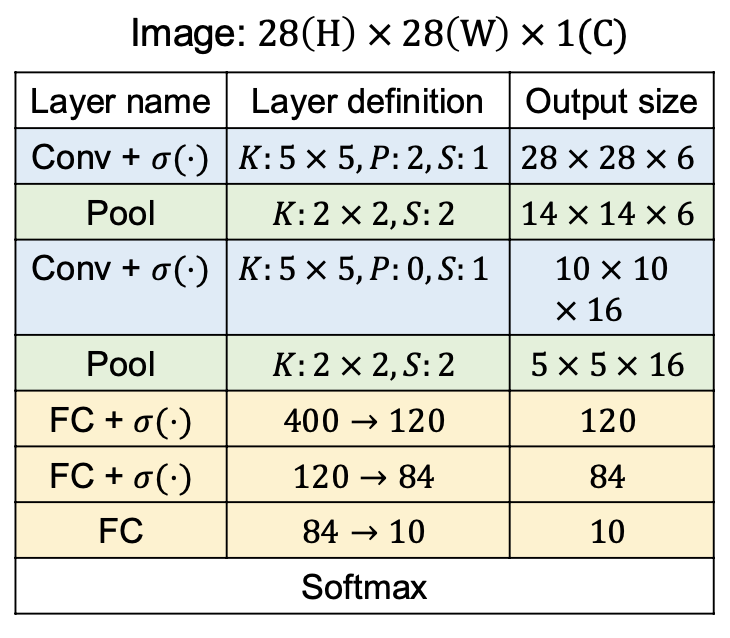


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# 1. Load the Data

# process images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define the LeNet Model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        ########################
        ### Your code starts here


        ### Your code ends here
        ########################

    def forward(self, x):
        ########################
        ### Your code starts here


        ### Your code ends here
        ########################
        return x

# define evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Instantiate the model, loss function, and optimizer
########################
### Your code starts here


### Your code ends here
########################

# 3. Train the Model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cuda:0')
model.to(device)


# Lists to store accuracies after each epoch
train_accuracies = []
test_accuracies = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        ########################
        ### Your code starts here
        # Zero the parameter gradients


        # Forward pass


        # Backward pass and optimization


        ### Your code ends here
        ########################

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

    # Evaluate the model on both train and test sets after each epoch
    train_accuracy = evaluate_model(model, train_loader)
    test_accuracy = evaluate_model(model, test_loader)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'End of Epoch {epoch + 1}')

print("Training complete!")

print(train_accuracies)
print(test_accuracies)

# Plot the train and test accuracies
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# <b>5.  ResNet (35 pts)


## 5.1 Basic block [8 pts]

<img height=150 src="https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png" />

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            # make sure the shortcut has the same dimension
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        #### Your code starts here ####
        # finish the forward pass

        #### Your code ends here ####
        return out

## 5.2 ResNet-18 model [17 pts]
Let's implement the smallest version of ResNet.

<img height=400 src="https://pytorch.org/assets/images/resnet.png">

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        # conv1: conv -> bn -> relu
        out = F.relu(self.bn1(self.conv1(x)))

        # other conv layers
        #### your code starts ####
        out = ???
        #### your code ends ####

        # avg pooling
        out = F.avg_pool2d(out, 4)
        # reshape
        out = out.view(out.size(0), -1)

        # classification
        #### your code starts ####
        out = ???
        #### your code ends ####
        return out

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

## 5.3 Train an ResNet-18 model [10 pts]
Can you train a ResNet-18 for MNIST classification?

Compare the performance with MLP and LeNet-5 models.

In [ ]:
#### your code starts ####


#### your code ends ####